# 2. Supervised Learning

### 2.3.5 결정 트리
- 회귀 문제에 널리 사용
- 

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

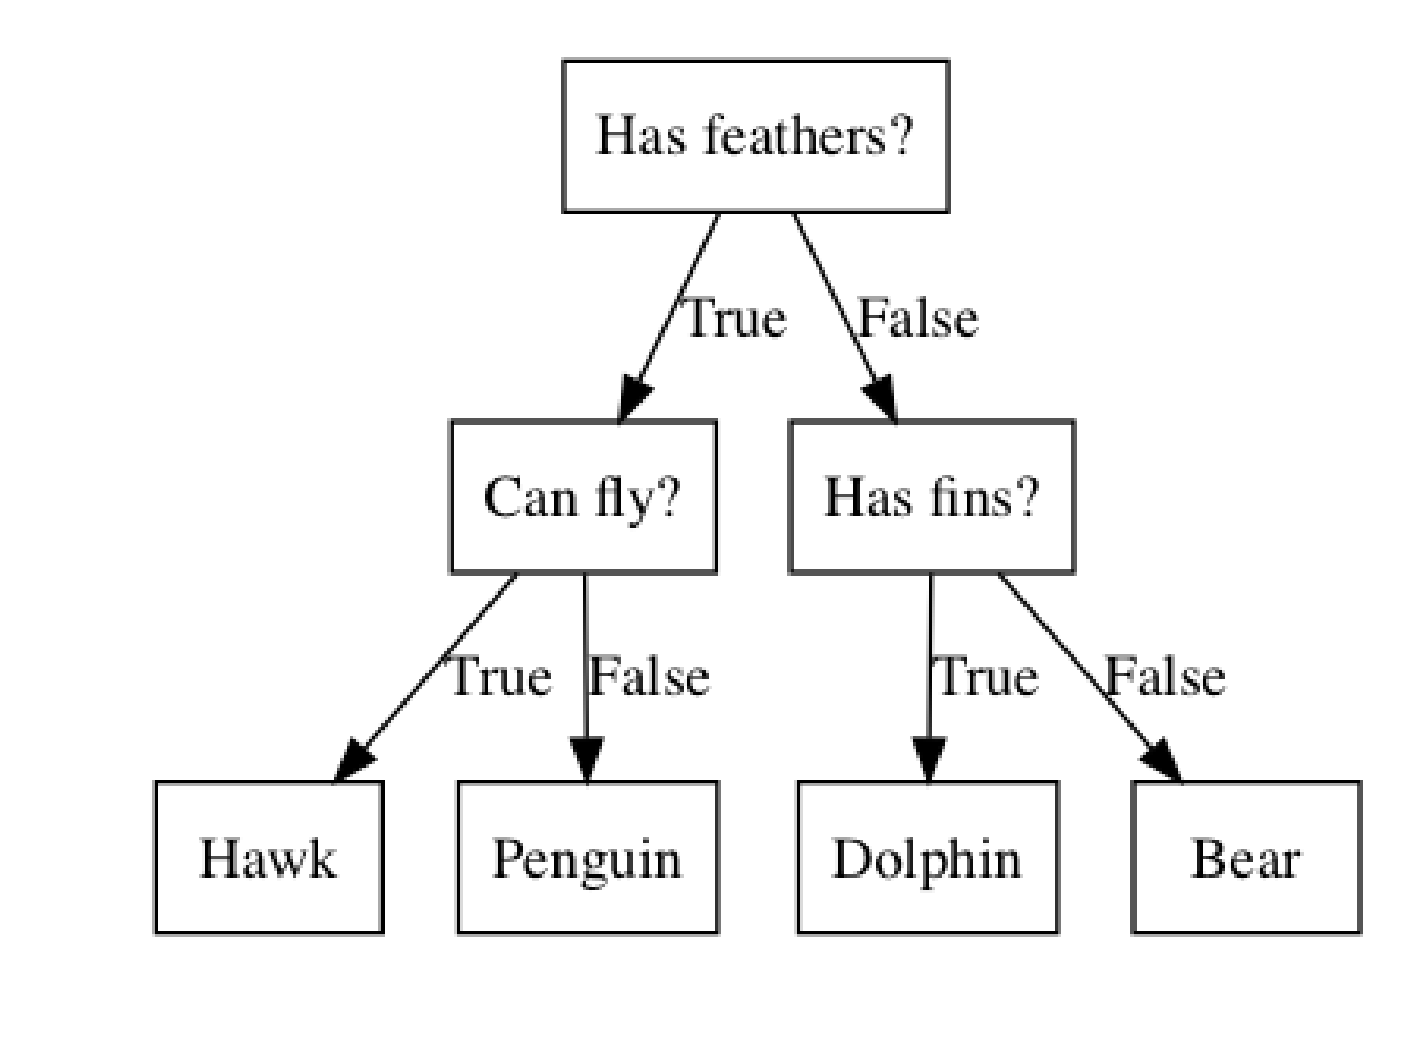

In [2]:
mglearn.plots.plot_animal_tree()

### 결정 트리의 복잡도 제어하기

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [4]:
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

- 유방암 데이터셋으로 만든 결정 트리
    - 시각화를 통하여 알고리즘의 예측이 어떻게 이루어 지는지 이해 가능

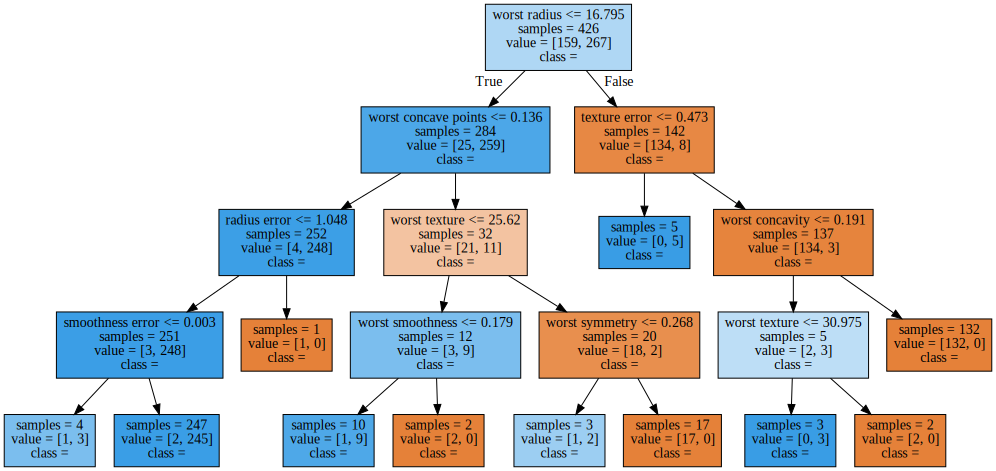

In [6]:
#graphviz 를 활용한 시각화
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리 특성 중요도

In [7]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.01
  0.048  0.     0.     0.002  0.     0.     0.     0.     0.     0.727
  0.046  0.     0.     0.014  0.     0.018  0.122  0.012  0.   ]


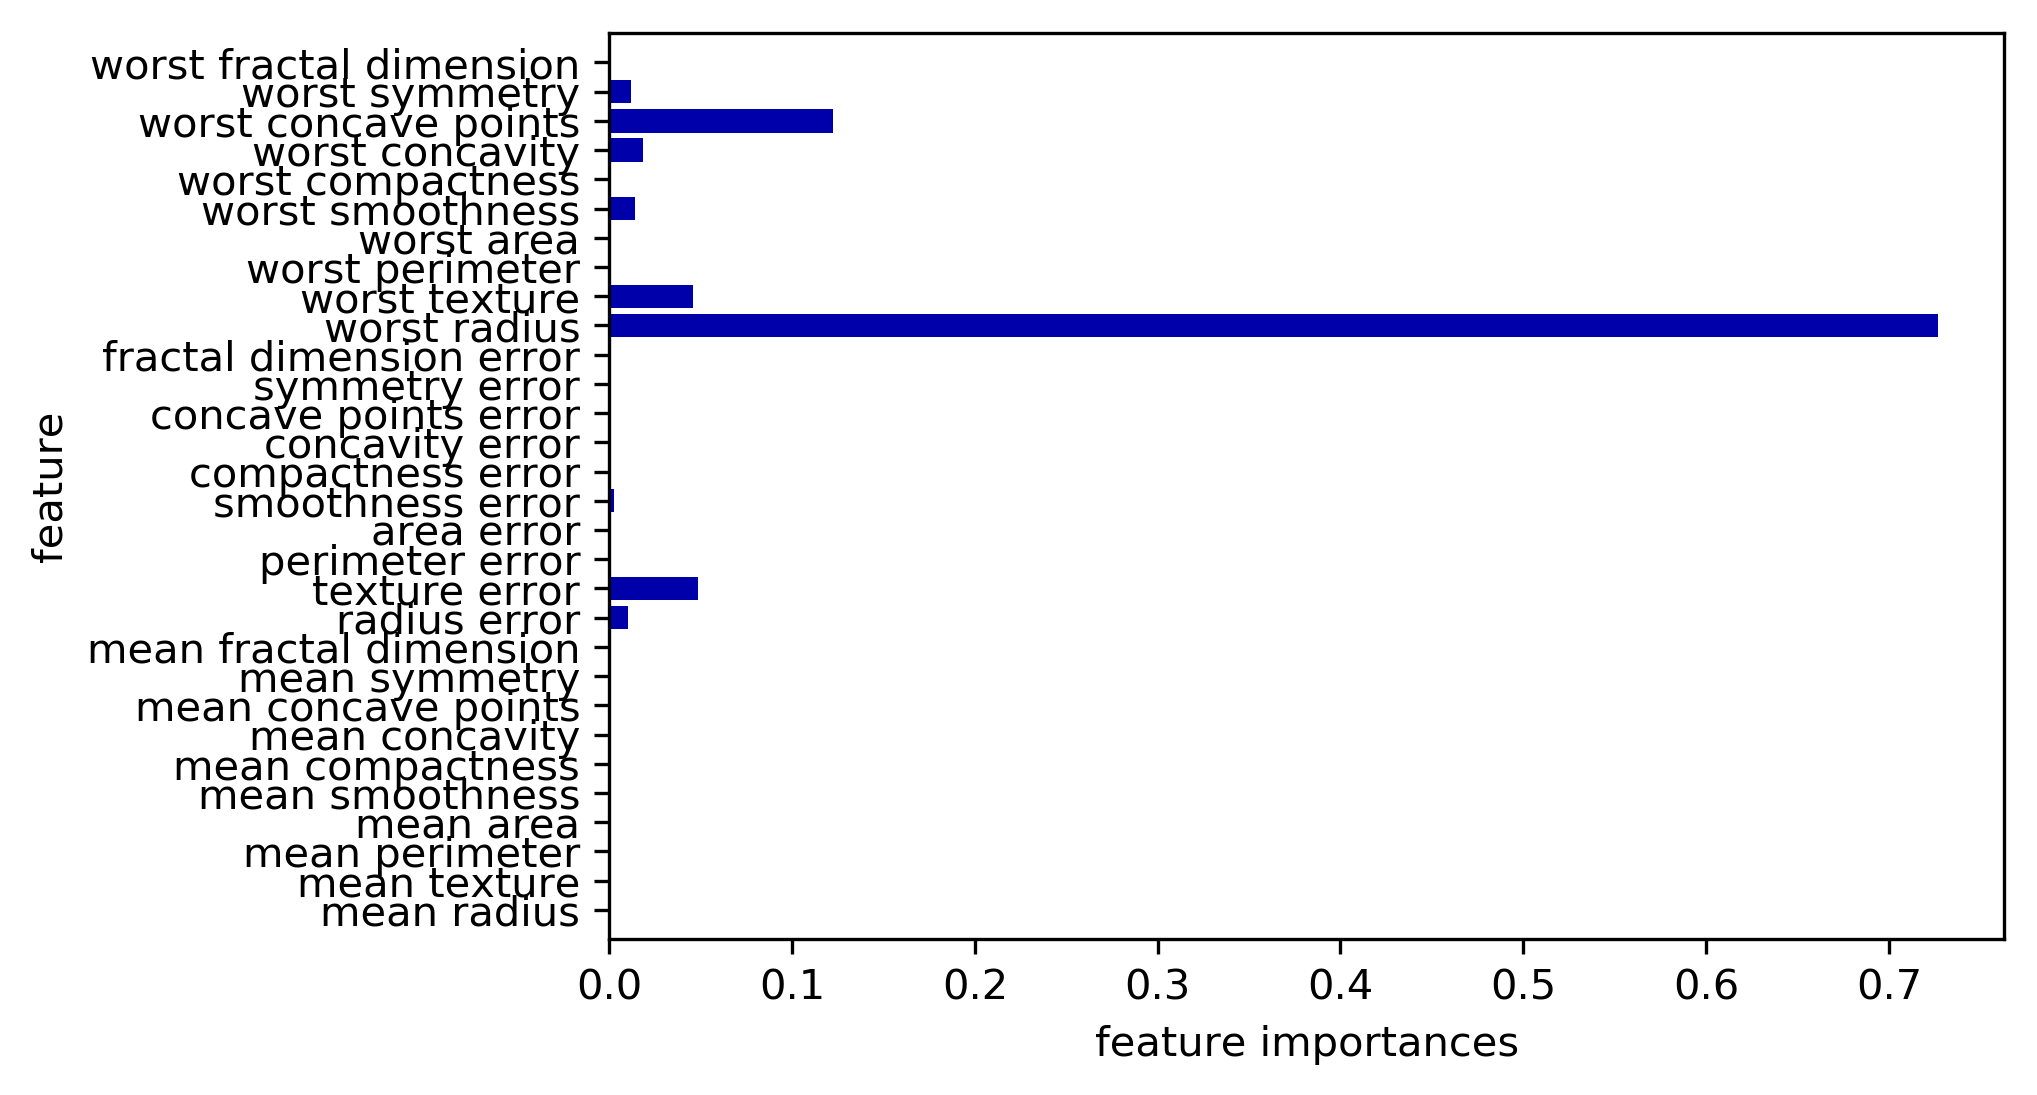

In [8]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


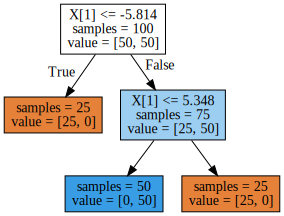

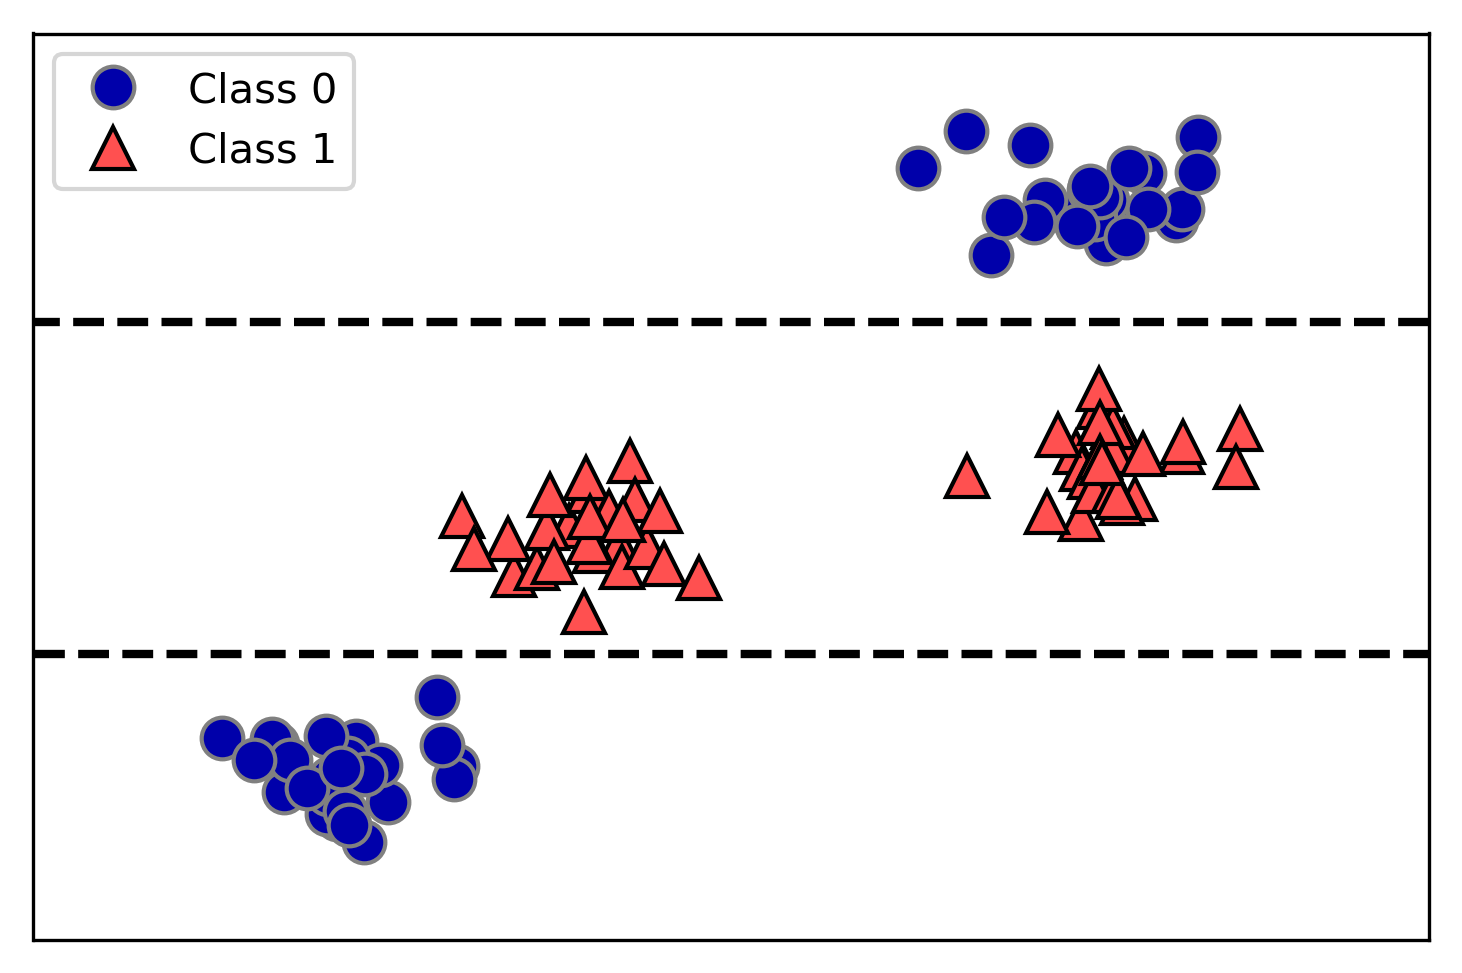

In [9]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### 로그 스케일로 그린 램 가격 동향

Text(0,0.5,'price ($/Mbyte)')

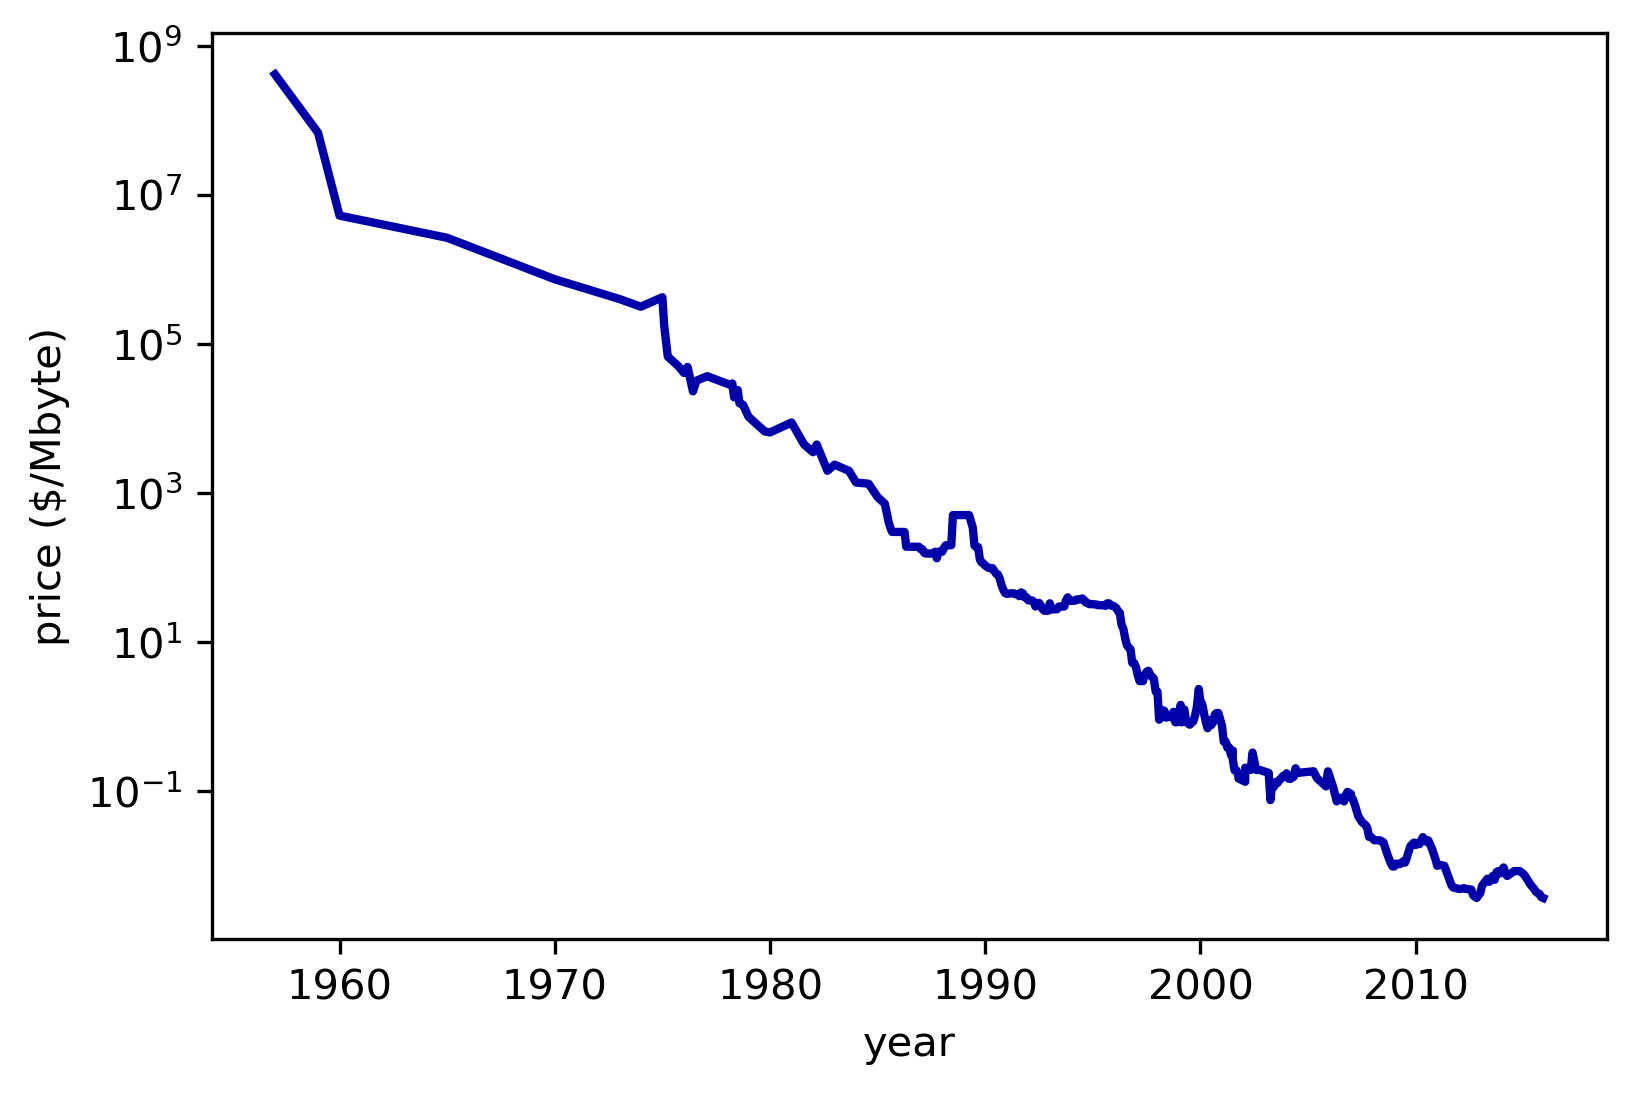

In [10]:
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#2000년 이전의 데이터를 훈련, 2000년 이후의 데이터를 테스트로 만듦
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]  #날짜의 특성만을 추출
y_train = np.log(data_train.price)        #데이터와 타셋의 관계를 간단하게 하기 위하여 로그 스케일로 변경

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)  #예측은 전체 기간에 대해 수행
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)  #예측한 값의 로그 스케일
price_lr = np.exp(pred_lr)

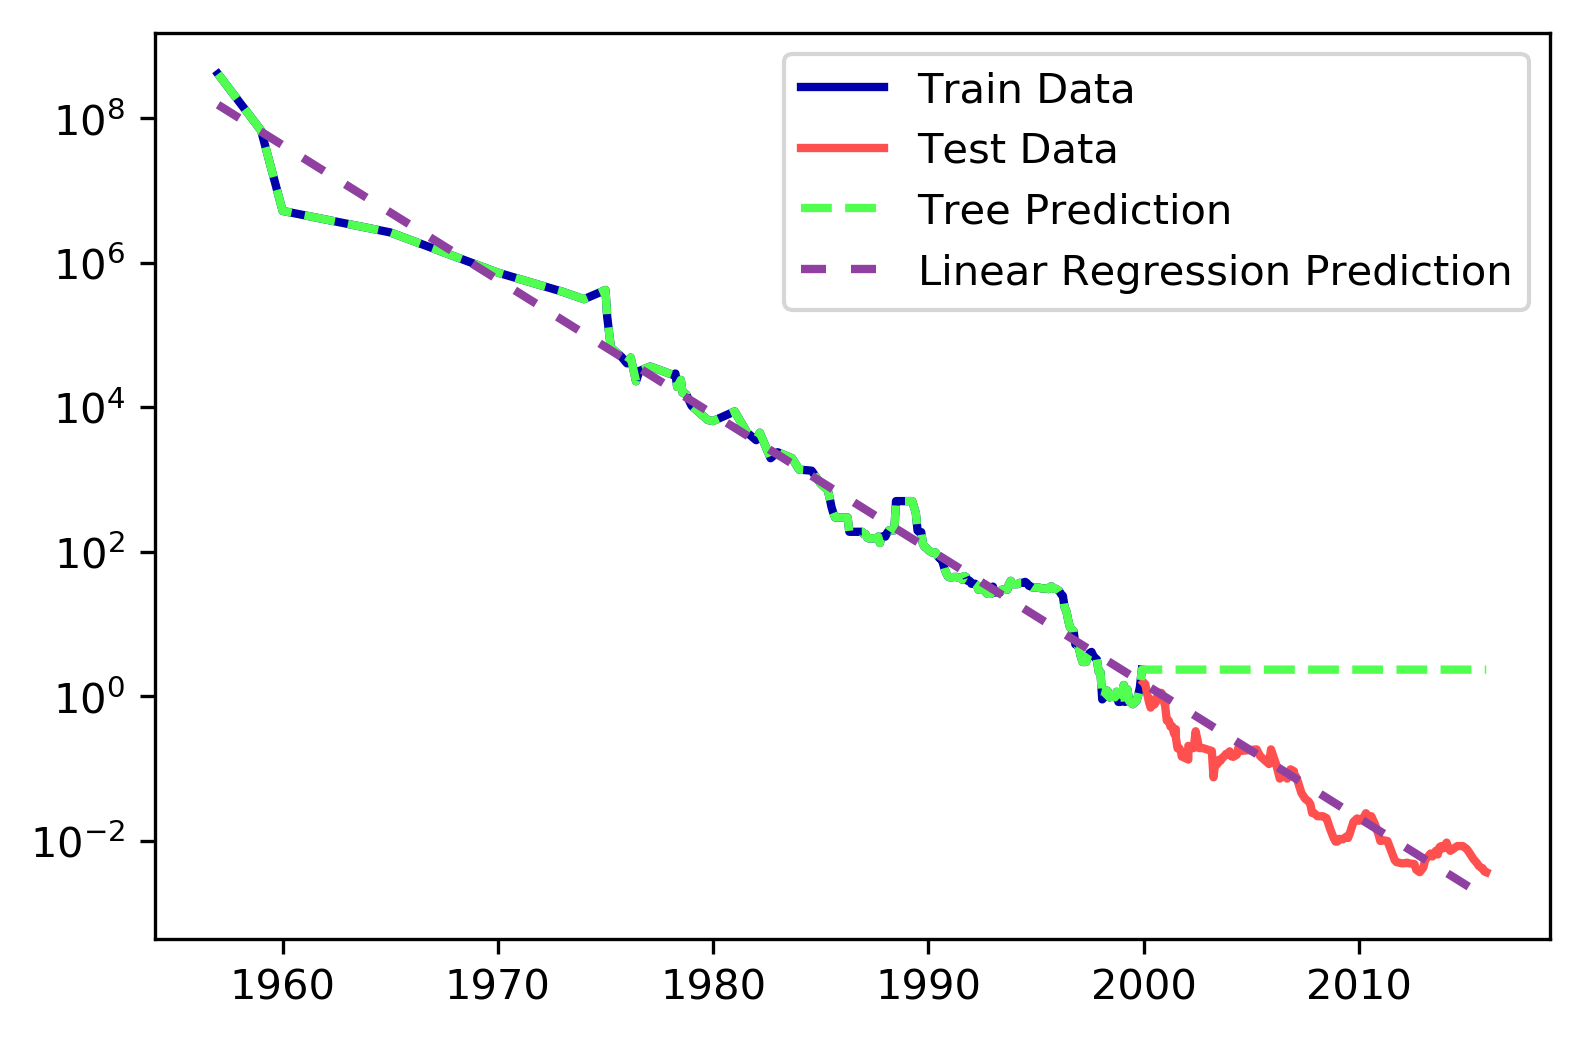

In [17]:
plt.semilogy(data_train.date, data_train.price, label="Train Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()

- 결정 트리에서 모델의 복잡도 조절
    - 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수
    - max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과적합 방지 가능